# Visualize COCO features

1. visualize coco features
2. identify pca-one; what is its cosine similarity with the residual (should be very high)
3. move along the direction, plot 1-dim loss landscape. [-2,-1,-0.5,0,0.5,1,2]
    - need to have a fn(scalar,), output loss. 


In [9]:
import argparse
import os
import random
import shutil
import time
import warnings
from enum import Enum
import pickle
import numpy as np
from collections import defaultdict

import torch
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torch.backends.cudnn as cudnn

In [10]:
pickle_path = './features/feature_dump_val.pkl'
with open(pickle_path, 'rb') as pkl_file:
    data_dict = pickle.load(pkl_file)
    assert len(data_dict['clip_image_features_list']) == len(data_dict['clip_text_features_list'])
    # assert len(data_dict['clip_image_features_list']) == len(data_dict['target_image_features_list'])
    print('Number of image-text pairs', len(data_dict['clip_image_features_list']))

Number of image-text pairs 5000


In [11]:
# visualize.

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set_theme()
# sns.set_context("talk", ) # paper, notebook, talk, and poster; font_scale=1.5,
sns.set_context("talk", font_scale=1.5 ) # paper, notebook, talk, and poster; font_scale=1.5,



In [12]:
def my_norm(x):
    return x/np.linalg.norm(x, axis=-1, keepdims=True)

image min similarity: -0.1691339910030365
count    2.499500e+07
mean     7.172320e-01
std      2.094808e-01
min     -1.691340e-01
25%      6.035541e-01
50%      7.745900e-01
75%      8.813174e-01
max      9.997278e-01
Name: image cosine pair similarity, dtype: float64
text min similarity: 0.21038226783275604
count    2.499500e+07
mean     6.720703e-01
std      7.973000e-02
min      2.103823e-01
25%      6.179126e-01
50%      6.812110e-01
75%      7.320701e-01
max      1.000000e+00
Name: text cosine pair similarity, dtype: float64


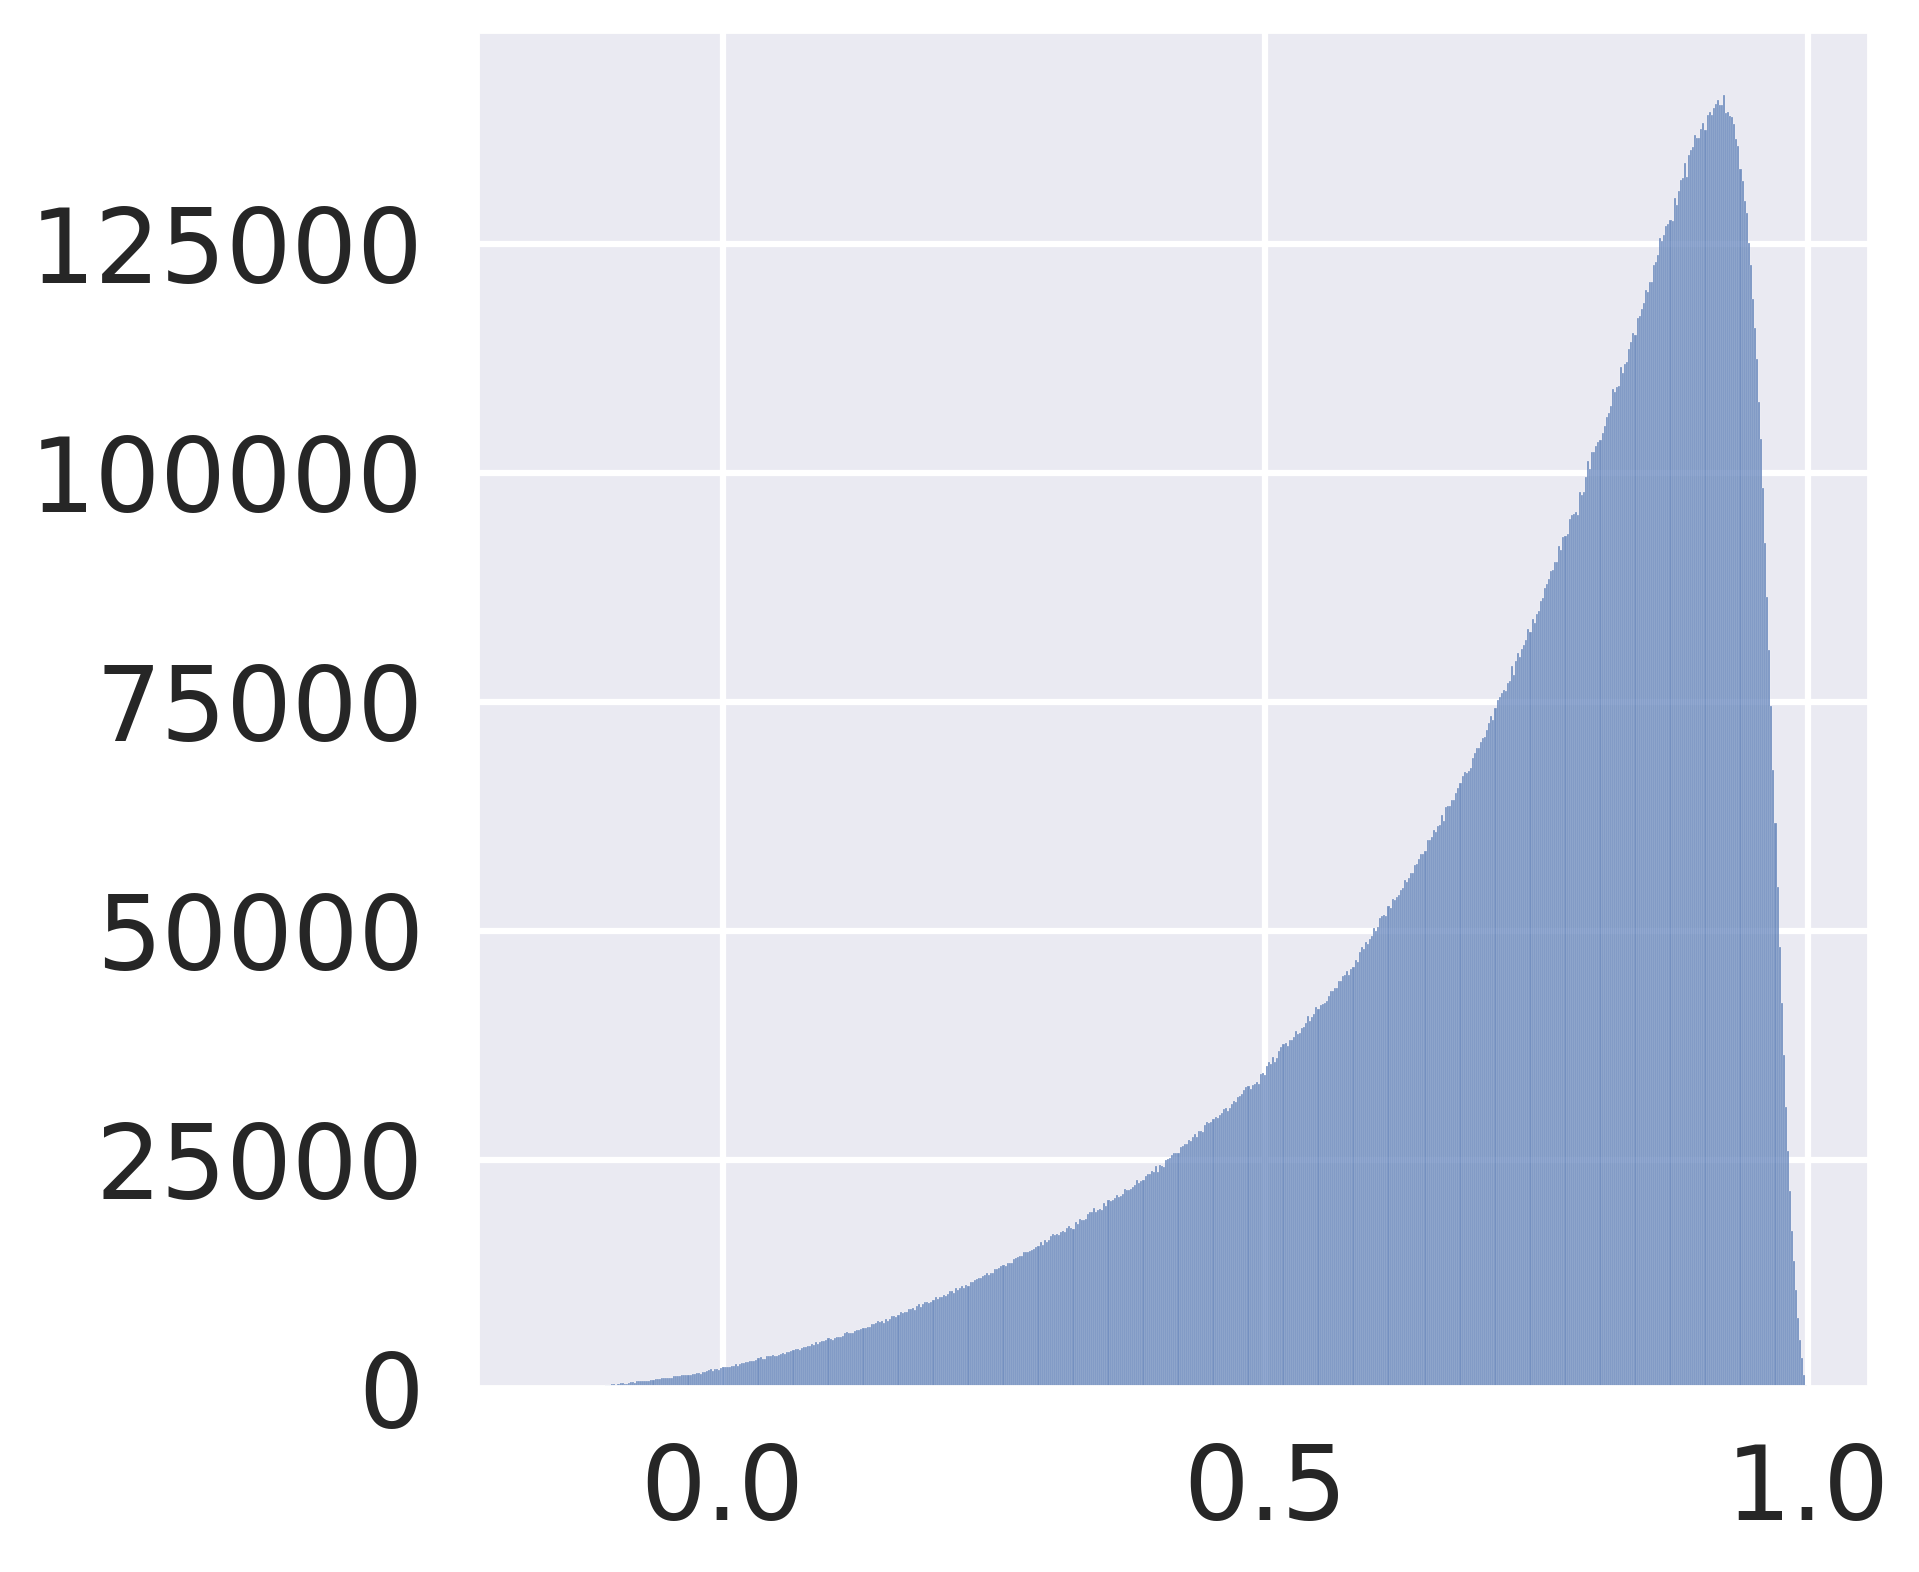

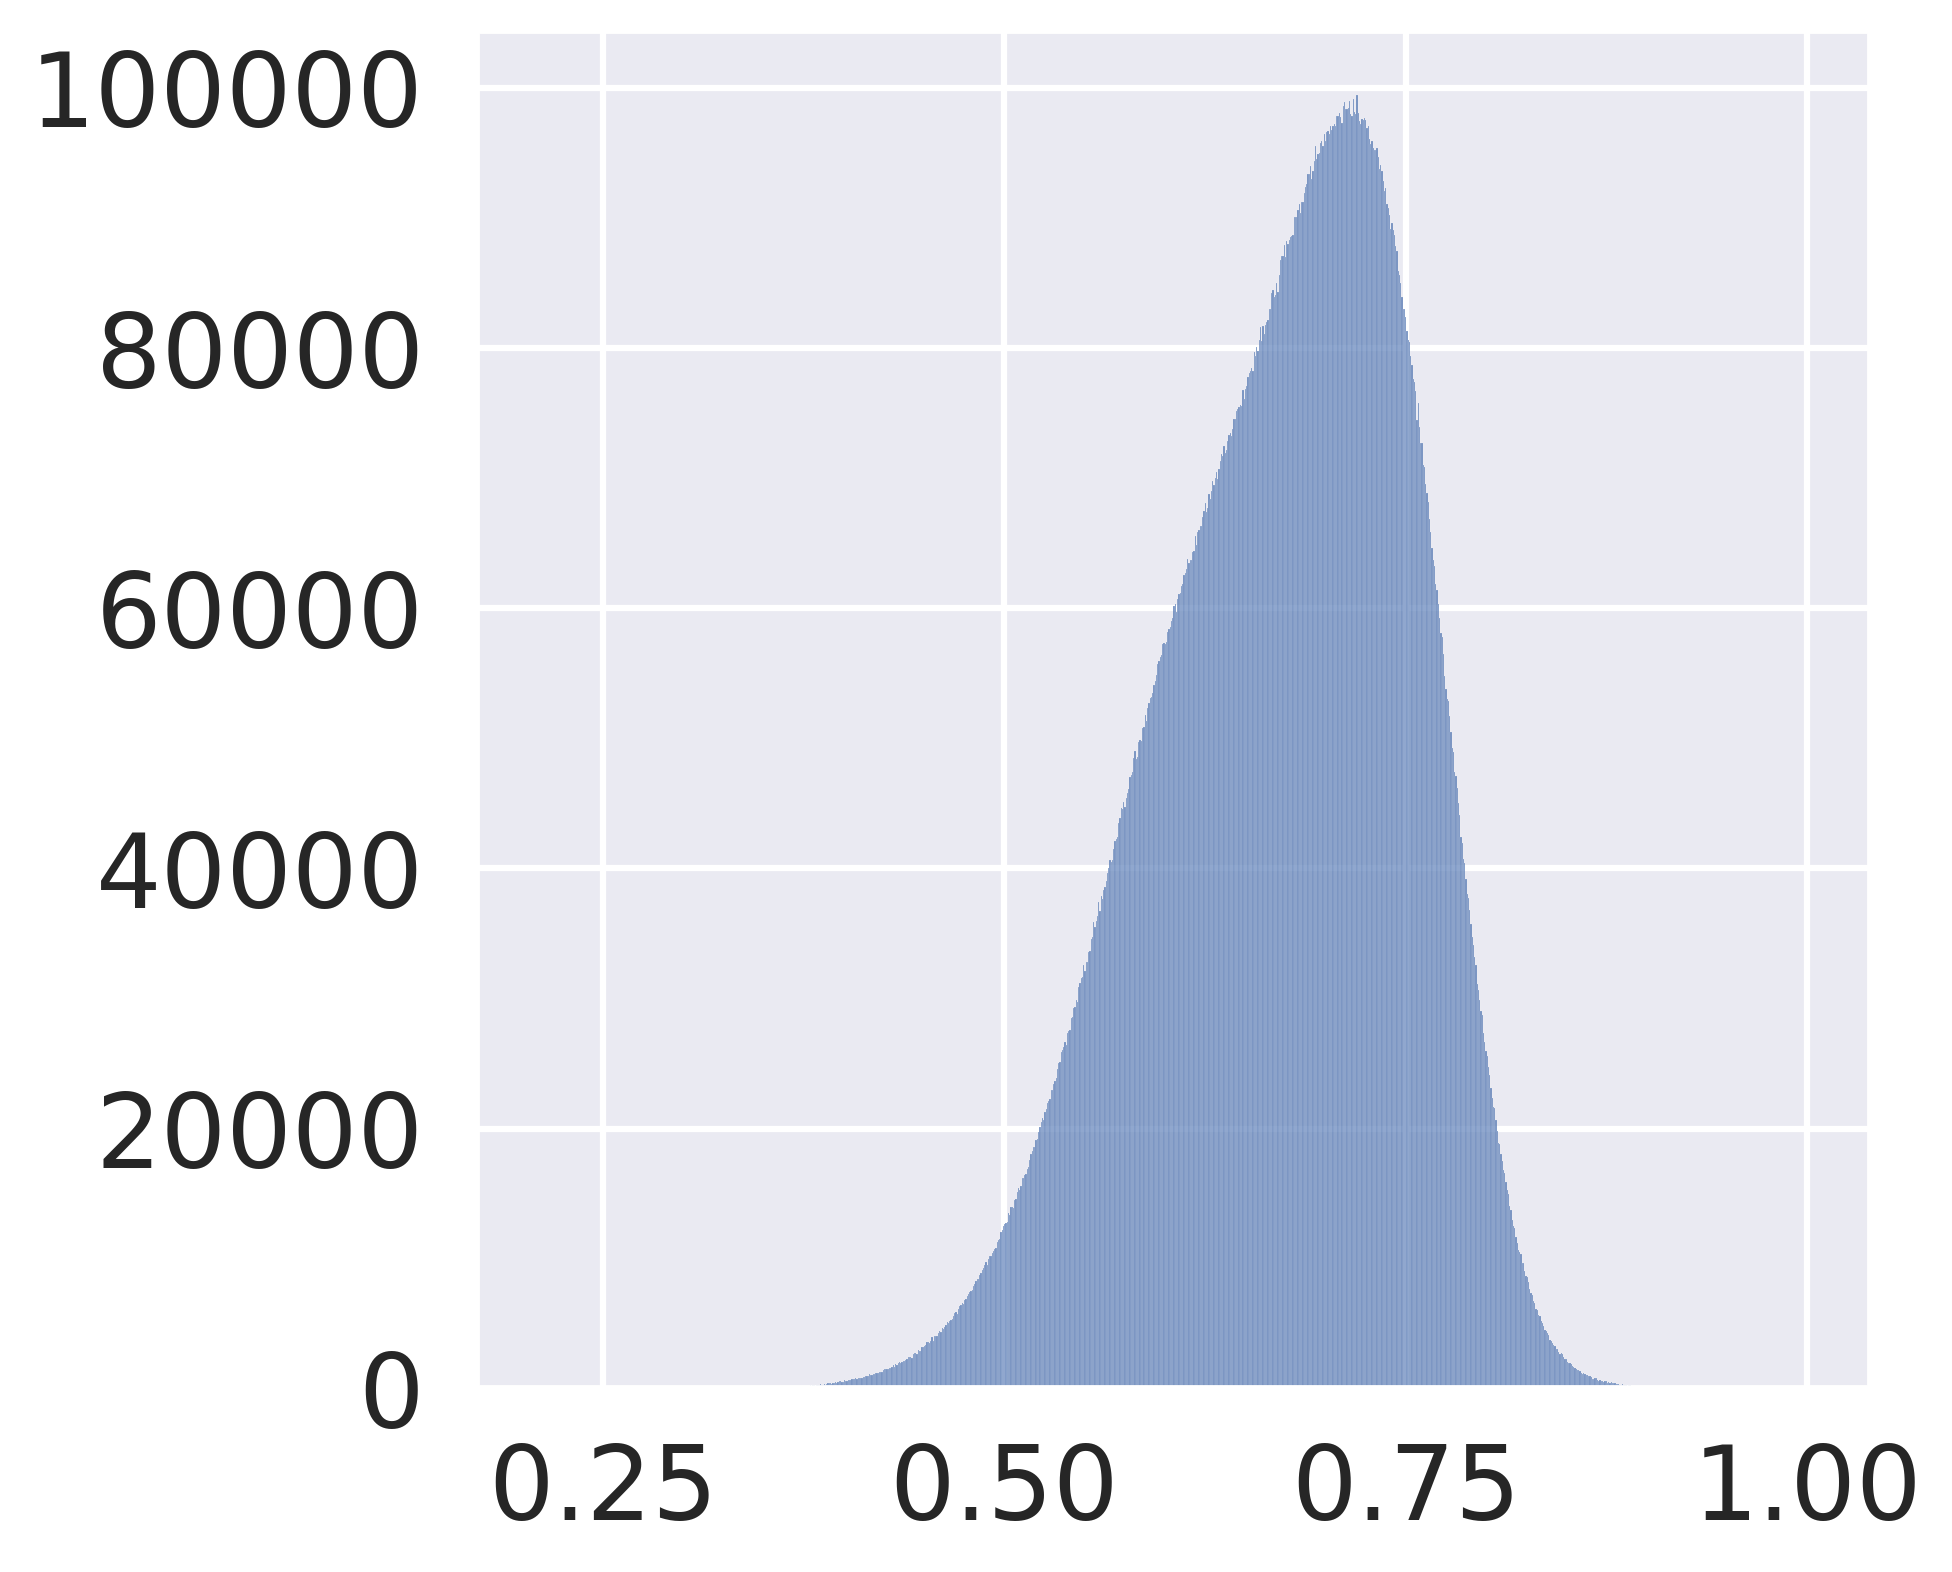

In [13]:
# text similarity. 
def pair_wise_similarity(modality_str):
    assert modality_str in ['residual', 'image', 'text']
    normed_feature = my_norm(data_dict['clip_{}_features_list'.format(modality_str)])
    similarity = normed_feature @ normed_feature.T
    # similarity = similarity.ravel().squeeze().tolist()
    similarity = similarity[~np.eye(similarity.shape[0],dtype=bool)].tolist()
    print(modality_str, 'min similarity:', min(similarity))

    x_name = '{} cosine pair similarity'.format(modality_str)
    tmp_df = pd.DataFrame({x_name: similarity})
    print(tmp_df[x_name].describe())

    plt.figure(figsize=(6,6))
    sns.histplot(data=tmp_df, x=x_name)
    plt.xlabel('')
    plt.ylabel('')

    # plt.close('all')
    return

pair_wise_similarity('image')
pair_wise_similarity('text')
# pair_wise_similarity('residual')


# Also verify ResNet

mean 0.9932078659162494
mean ResNet-18 cosine pair similarity    0.993208
dtype: float64
count    2.499500e+07
mean     9.932079e-01
std      4.404923e-03
min      9.460288e-01
25%      9.916705e-01
50%      9.945126e-01
75%      9.961753e-01
max      9.998096e-01
Name: ResNet-18 cosine pair similarity, dtype: float64


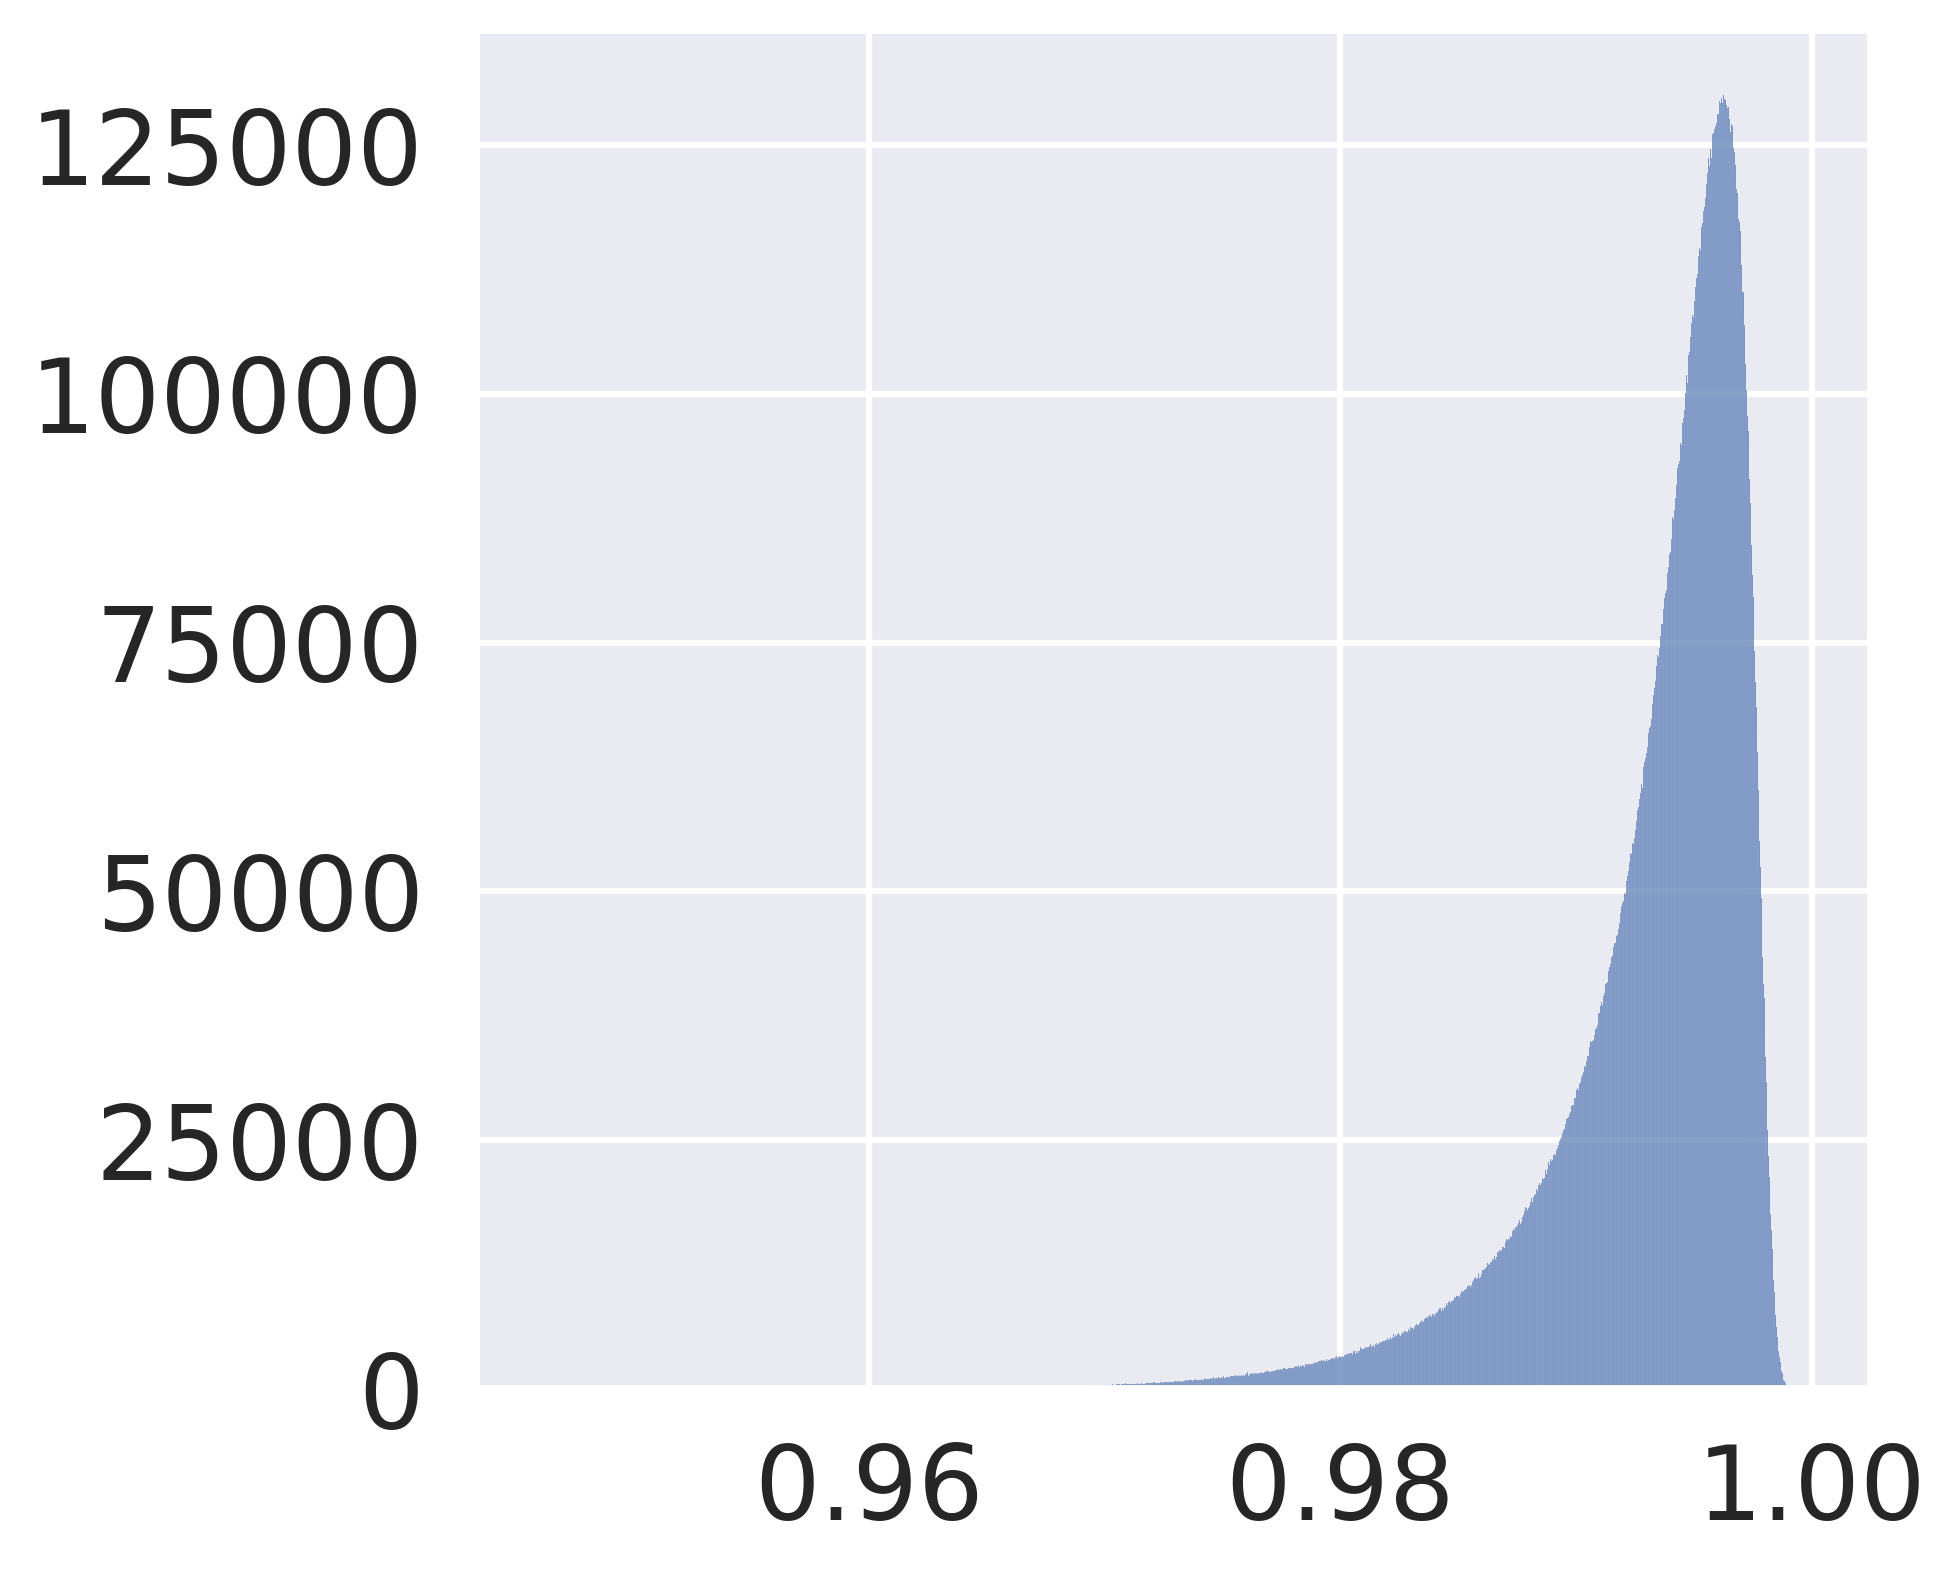

In [14]:
# text similarity. 
def resnet_pair_wise_similarity():
    normed_feature = my_norm(data_dict['target_image_features_list']) # ResNet-18 
    similarity = normed_feature @ normed_feature.T
    # similarity = similarity.ravel().squeeze().tolist()
    similarity = similarity[~np.eye(similarity.shape[0],dtype=bool)].tolist()
    print('mean', np.mean(similarity))

    x_name = 'ResNet-18 cosine pair similarity'
    tmp_df = pd.DataFrame({x_name: similarity})
    print('mean', tmp_df.mean()) # wrong mean! 
    print(tmp_df[x_name].describe())
    plt.figure(figsize=(6,6))
    sns.histplot(data=tmp_df, x=x_name)
    plt.xlabel('')
    plt.ylabel('')
    plt.plot()
    # plt.close('all')
    return

resnet_pair_wise_similarity()